## Descriptive Analysis of the popular Kaggle - Titanic Dataset

### What is the goal of this analysis?
The goal is to find out, who was more likely to survive than others.
Or: Which features were important for survival?

#### Plan of Analysis / Brainstorming
* Have a general look at the data
    * Missing Data
    * Categorization of Age / Fares ?
    * Changing Sex to 1 and 2
    * Deleting useless features
    * Diagrams
    * Distributions
    * Correlations
* Which features are interesting?
    * Explore those deeper
    * Create new features if possible
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load train_set for EDA
data = pd.read_csv('titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
cols = ['PassengerId']
data.drop(cols, axis = 1, inplace = True)

In [4]:
#Change Sex to 1 for male, 2 for female
data['Sex'] = np.where(data['Sex'] == 'male', 1, 2)

In [5]:
data.describe() #categorical are excluded

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,1.352413,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,2.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Helper function giving me overview of missing data
def miss_vals_tbl (df):
        zero_vals = (df == 0.00).astype(int).sum(axis=0)
        mis_vals = df.isnull().sum()
        mis_vals_percent = 100 * df.isnull().sum() / len(df)
        duplicates = df.duplicated().sum()
        tbl = pd.concat([zero_vals, mis_vals, mis_vals_percent], axis=1)
        tbl = tbl.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        tbl['Data Type'] = df.dtypes
        tbl = tbl[
            tbl.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("""The dataframe has {} columns and {} rows.\nThere are {} columns that have missing values.\nThe dataframe has {} duplicates."""
               .format(str(df.shape[1]), str(df.shape[0]), str(tbl.shape[0]), duplicates))
        return tbl

In [7]:
miss_vals_tbl(data)

The dataframe has 11 columns and 891 rows.
There are 3 columns that have missing values.
The dataframe has 0 duplicates.


,Zero Values,Missing Values,% of Total Values,Data Type
Cabin,0,687,77.1,object
Age,0,177,19.9,float64
Embarked,0,2,0.2,object


In [8]:
#drop Cabin because of 77% missing data
data.drop(['Cabin'], axis = 1, inplace = True)

In [9]:
#Fill Age with Median
data['Age'].fillna(data['Age'].median(), inplace = True)

In [10]:
#Del rows with missing Embarked
data.dropna(inplace = True)

#dropping duplicates not needed, no duplicates contained

#reset the index
data.reset_index(drop = True, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    int64  
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.6+ KB


In [11]:
#Create a categorical and numerical dataset - easier for further anaylsis / visualization
data_cat = data[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]

data_num = data[['Survived', 'Age', 'Fare']]

### Categorical Data

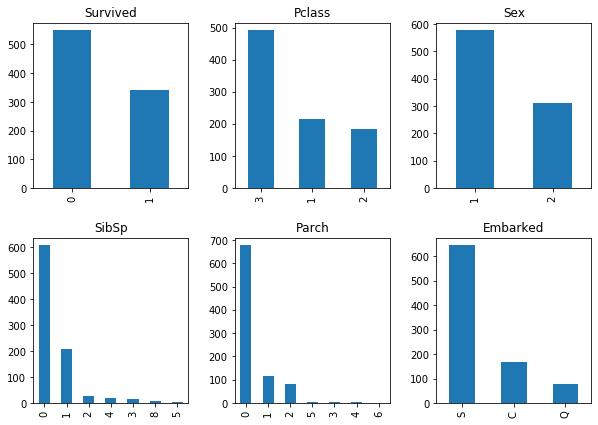

In [12]:
fig, axes = plt.subplots(2, 3)

#Data Columns and counter to iterate through those
cols = data_cat.columns
c = 0

for i in range(2):
    for j in range(3):
        data_cat[cols[c]].value_counts().plot.bar(ax = axes[i, j]
                                                  , title = cols[c]
                                                  , figsize = (10,7))
        plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
        c+=1

In [13]:
data_cat['Sex'].value_counts()

1    577
2    312
Name: Sex, dtype: int64

In [14]:
#Bivariate Analysis
cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for col in cols:
    print(pd.pivot_table(data, index = 'Survived', columns = col, values = 'Ticket', aggfunc = 'count'), '\n')

Pclass      1   2    3
Survived              
0          80  97  372
1         134  87  119 

Sex         1    2
Survived          
0         468   81
1         109  231 

SibSp         0      1     2     3     4    5    8
Survived                                          
0         398.0   97.0  15.0  12.0  15.0  5.0  7.0
1         208.0  112.0  13.0   4.0   3.0  NaN  NaN 

Parch         0     1     2    3    4    5    6
Survived                                       
0         445.0  53.0  40.0  2.0  4.0  4.0  1.0
1         231.0  65.0  40.0  3.0  NaN  1.0  NaN 

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217 



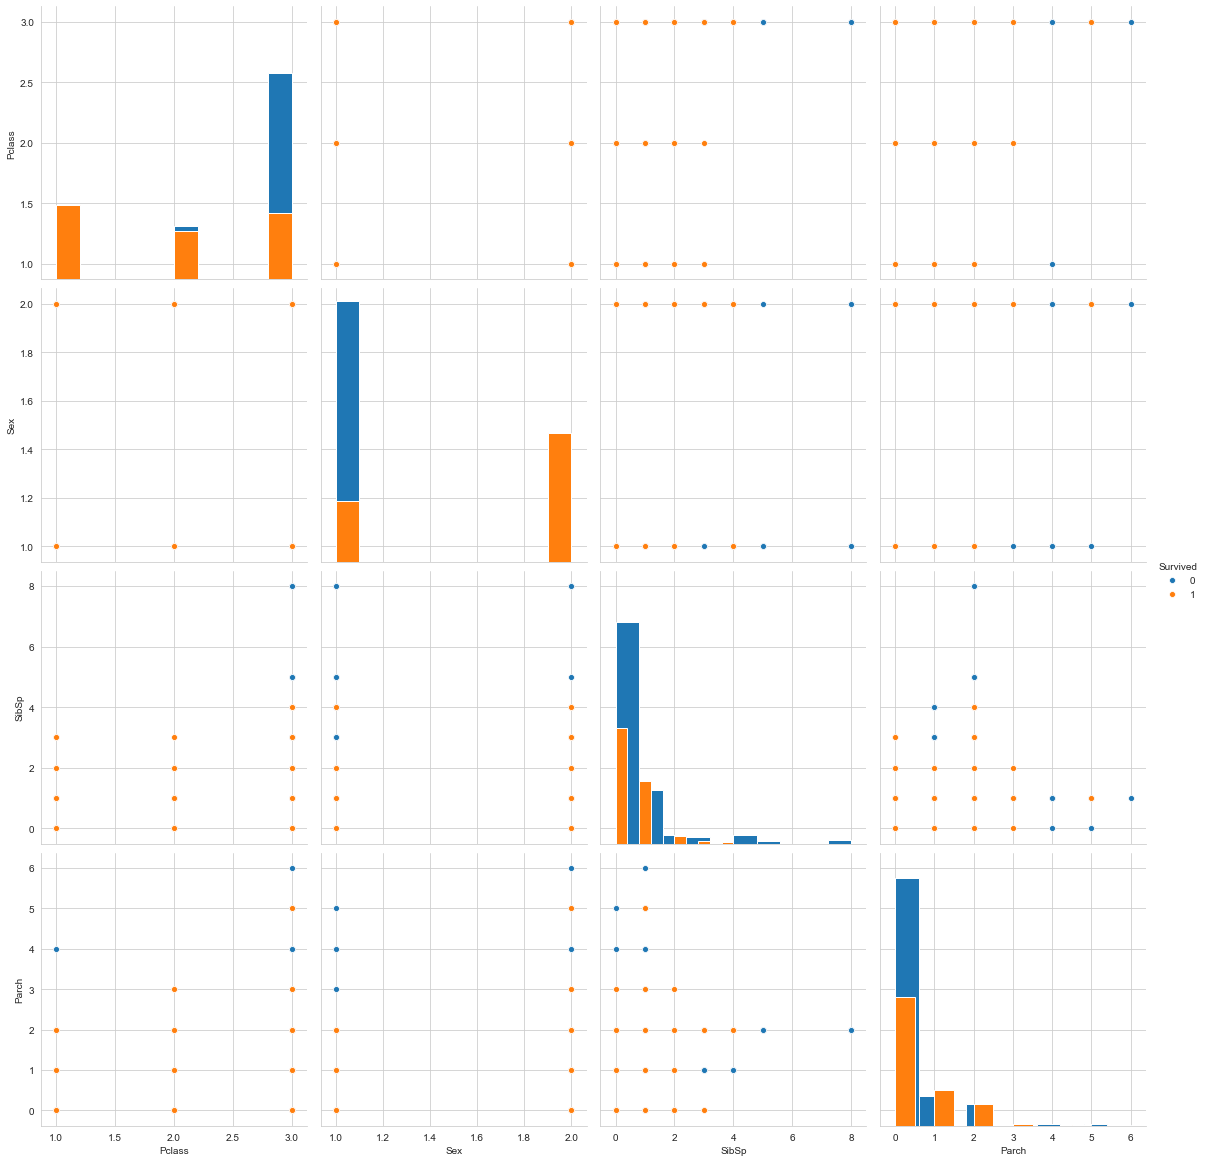

In [15]:
#Pairplots - should be done for numeric and some categorical data
cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

sns.set_style('whitegrid')
sns.pairplot(data[cols]
             , hue = 'Survived'
             , height = 4
             , diag_kind = 'hist'
            )
plt.show()

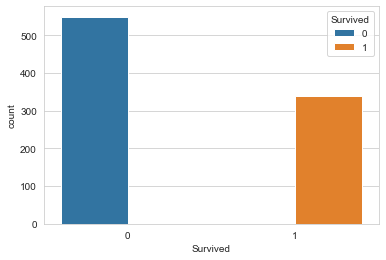

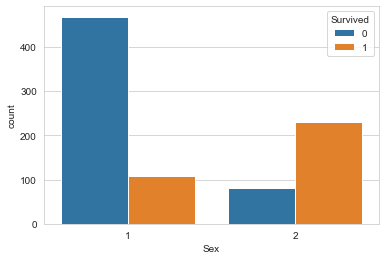

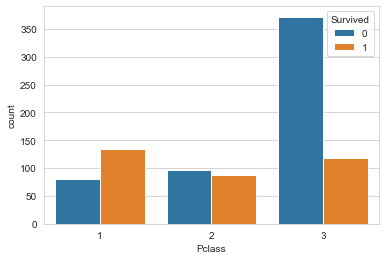

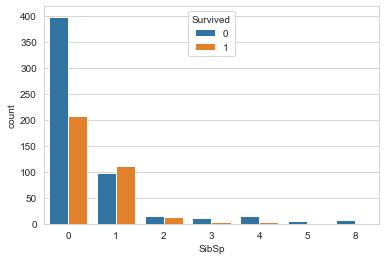

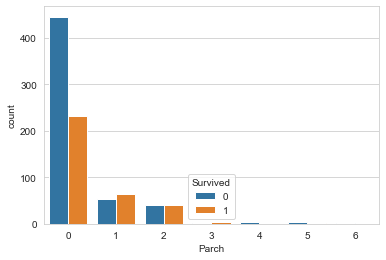

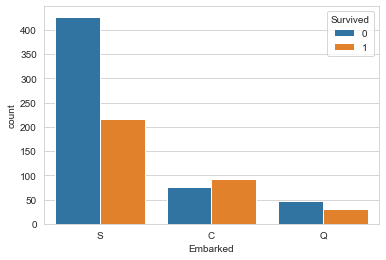

In [16]:
#Countplots with respects to the Survival - bivariate
cols = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

for col in cols:
    sns.countplot(data[col], data = data, hue = 'Survived')
    plt.show()

### Numerical Data

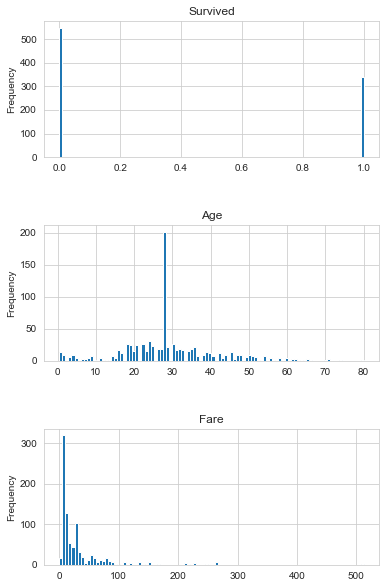

In [17]:
fig, axes = plt.subplots(3, 1)

for i, col in enumerate(data_num.columns):
    data_num[col].plot.hist(ax = axes[i], bins = 100, title = col, figsize = (6, 10))
    plt.subplots_adjust(hspace = 0.5)
    

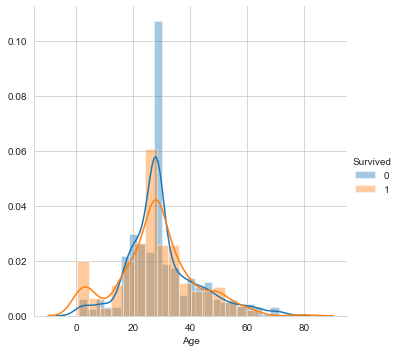

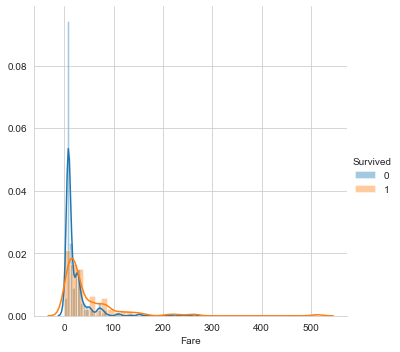

In [18]:
#Bivariate analysis
cols = ['Age', 'Fare']

for col in cols:
    sns.FacetGrid(data_num
             , hue = 'Survived'
             , height = 5) \
            .map(sns.distplot, col) \
            .add_legend()
    plt.show()


### Correlations

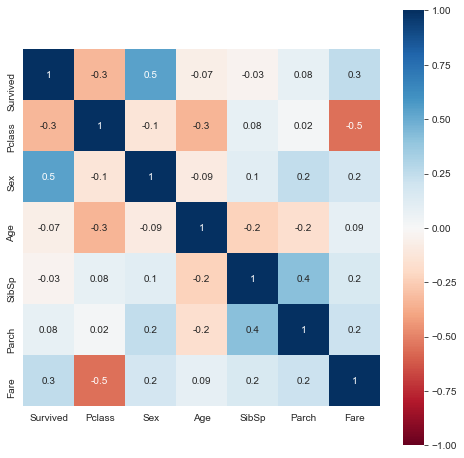

In [19]:
plt.figure(figsize = (8, 8))
sns.heatmap(data.corr()
           , annot = True
           , fmt = '.1g'
           , vmin = -1
           , vmax = 1
           , cmap = 'RdBu'
           , square = True)

plt.show(sns)

### Boxplots

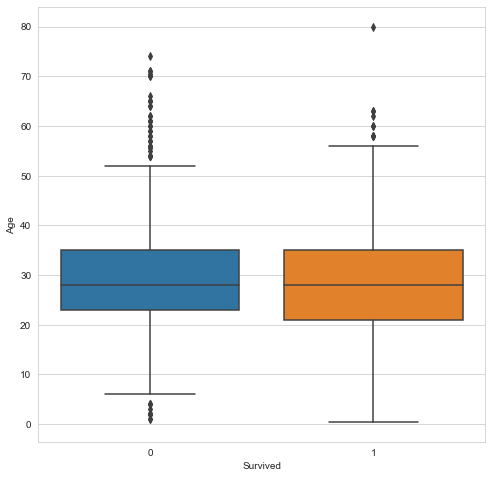

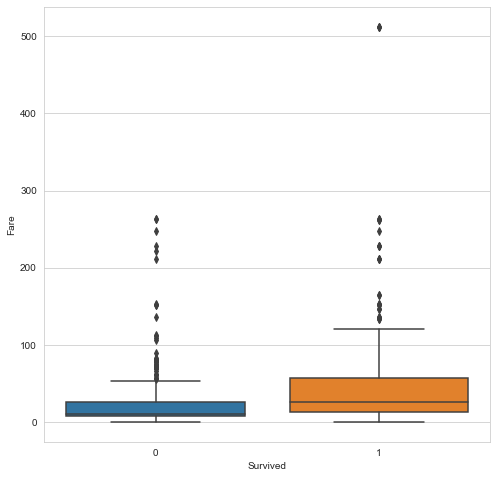

In [20]:
cols = ['Age', 'Fare']

for col in cols:
    plt.figure(figsize = (8, 8))
    sns.boxplot(data = data, x = 'Survived', y = col)
    plt.show()

<Figure size 576x576 with 0 Axes>

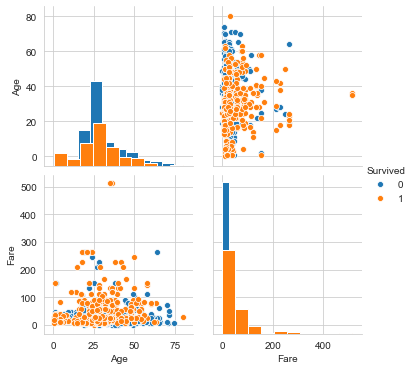

In [21]:
plt.figure(figsize = (8, 8))

sns.set_style('whitegrid')
sns.pairplot(data_num
             , diag_kind = 'hist' 
             , hue = 'Survived'
            )

plt.show()